In [1]:
import io
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg

In [2]:
wifesAge = 'Wifes age'
wifesEducation = 'Wifes education'
husbandsEducation = 'Husbands education '
childrenBorn = 'Number of children ever born'
wifesReligion = 'Wifes religion'
wifeIsWorking = 'Wifes now working?'
husbandsOcupation = 'Husbands occupation'
standardOfLiving = 'Standard-of-living index'
mediaExposure = 'Media exposure'
contraceptiveMethod = 'Contraceptive method used'

colNames= [
    wifesAge, 
    wifesEducation, 
    husbandsEducation, 
    childrenBorn, 
    wifesReligion, 
    wifeIsWorking, 
    husbandsOcupation, 
    standardOfLiving, 
    mediaExposure, 
    contraceptiveMethod,
    ]

#Retrieved data from: https://archive.ics.uci.edu/ml/datasets/Contraceptive+Method+Choice
dataFrame = pd.read_table('./data/cmc.data', sep=',', names=colNames)

def castToCategoricalColumns(columns, dataSet):
  for i in columns:
    dataSet[i] = pd.Categorical(dataSet[i])

def plotCategoricalVariables(columns:list, dataSet: pd.DataFrame):
  for i in columns:
    values = dataSet[i].unique();
    plt.figure(f'values in {i} column', figsize=(8,3))
    sns.countplot(data = dataSet, x = i)

def setCategoricalLabels(columns, dataSet, labels)->None:
  for i in columns:
    dataSet[i] = dataSet[i].replace(labels[i][0], labels[i][1])

categoryFactors = {
    wifesEducation:[
      [1, 2, 3, 4]
    , [
        'low',
        'medium-low',
        'medium-high',
        'high',
    ]], 
    husbandsEducation:[
      [1, 2, 3, 4]
    , [
        'low',
        'medium-low',
        'medium-high',
        'high',
    ]],  
    wifesReligion:[
      [0, 1]
    , [
        'Non islam',
        'Islam',
    ]], 
    wifeIsWorking:[
      [0, 1]
    , [
        'Yes',
        'No',
    ]], 
    husbandsOcupation:[
      [1, 2, 3, 4]
    , [
        'Professional, technical and clerical',
        'Sales, services',
        'Manual',
        'Agriculture',
    ]], 
    standardOfLiving:[
      [1, 2, 3, 4]
    , [
        'low',
        'medium-low',
        'medium-high',
        'high',
    ]], 
    mediaExposure:[
      [0, 1]
    , [
        'Good',
        'Not good',
    ]], 
    contraceptiveMethod:[
      [1, 2, 3]
    , [
        'No use',
        'Long term',
        'Short term',
    ]],
}

/home/armsjs/anaconda3/envs/DataSciencePortfolio/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
categoricalVariables = [wifesEducation, husbandsEducation, wifesReligion, wifeIsWorking, husbandsOcupation, standardOfLiving, mediaExposure]
numericalVariables = [wifesAge, childrenBorn]
target = contraceptiveMethod

setCategoricalLabels([*categoricalVariables, target], dataFrame, categoryFactors)

#plotCategoricalVariables([*categoricalVariables, target], dataFrame)

dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Wifes age                     1473 non-null   int64 
 1   Wifes education               1473 non-null   object
 2   Husbands education            1473 non-null   object
 3   Number of children ever born  1473 non-null   int64 
 4   Wifes religion                1473 non-null   object
 5   Wifes now working?            1473 non-null   object
 6   Husbands occupation           1473 non-null   object
 7   Standard-of-living index      1473 non-null   object
 8   Media exposure                1473 non-null   object
 9   Contraceptive method used     1473 non-null   object
dtypes: int64(2), object(8)
memory usage: 115.2+ KB


In [6]:
binomialYData = dataFrame.copy()
binomialYData[target] = binomialYData[target].replace([
        'Long term',
        'Short term',
    ], 'Use')

binomialYData[husbandsEducation] = binomialYData[husbandsEducation].replace(['medium-low', 'medium-high'], ['low', 'high'])

binomialYData[wifesEducation] = binomialYData[wifesEducation].replace(['medium-low', 'medium-high'], ['low', 'high'])

binomialYData[standardOfLiving] = binomialYData[standardOfLiving].replace(['medium-low', 'medium-high'], ['low', 'high'])

binomialYData.head()

,Wifes age,Wifes education,Husbands education,Number of children ever born,Wifes religion,Wifes now working?,Husbands occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,low,high,3,Islam,No,"Sales, services",high,Good,No use
1,45,low,high,10,Islam,No,Manual,high,Good,No use
2,43,low,high,7,Islam,No,Manual,high,Good,No use
3,42,high,low,9,Islam,No,Manual,high,Good,No use
4,36,high,high,8,Islam,No,Manual,low,Good,No use


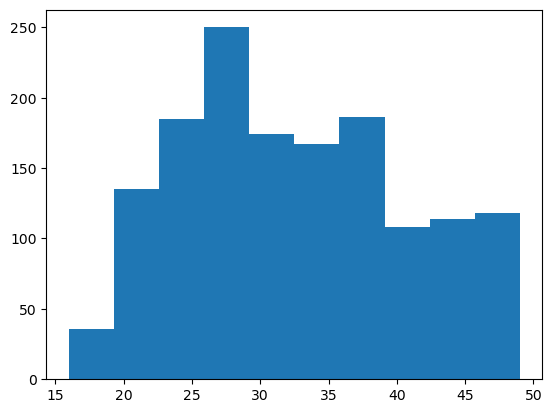

32.53835709436524


In [10]:
def showContinousVariableDescription(data, column):
  plt.hist(data[column])
  plt.show()
  print(data[column].mean())

showContinousVariableDescription(binomialYData, wifesAge)

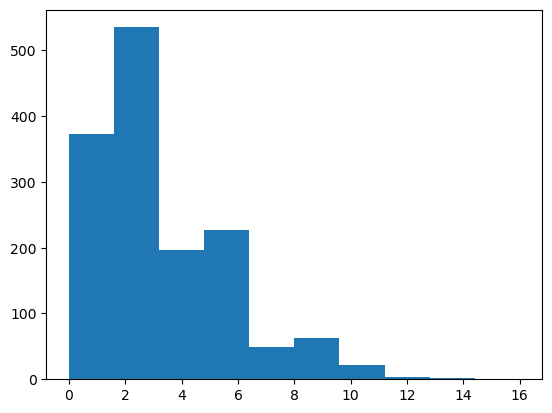

3.2613713509843856


In [9]:


showContinousVariableDescription(binomialYData, childrenBorn)

<AxesSubplot:xlabel='Wifes education'>

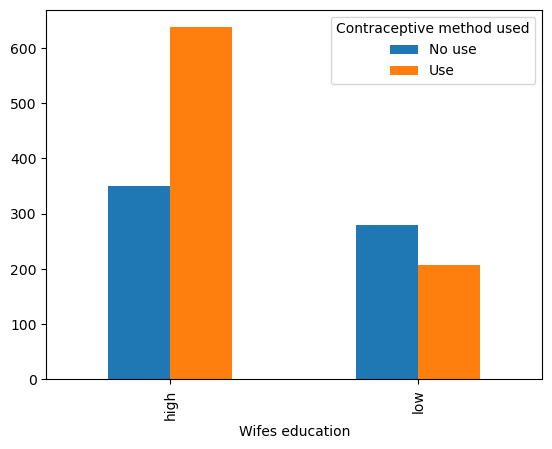

In [11]:
pd.crosstab(binomialYData[wifesEducation], binomialYData[contraceptiveMethod]).plot(kind='bar')

<AxesSubplot:xlabel='Wifes education'>

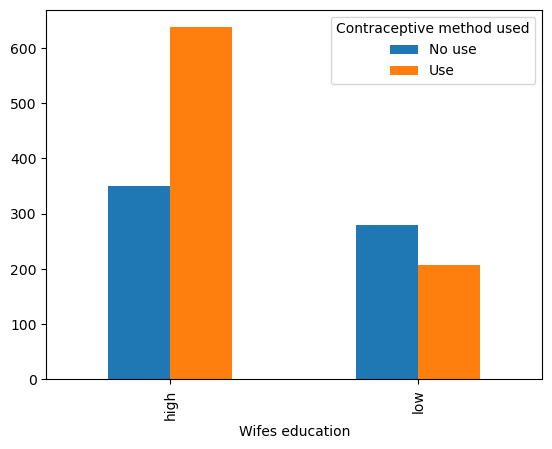

In [14]:
pd.crosstab(binomialYData[wifesEducation], binomialYData[contraceptiveMethod]).plot(kind='bar')

<AxesSubplot:xlabel='Husbands education '>

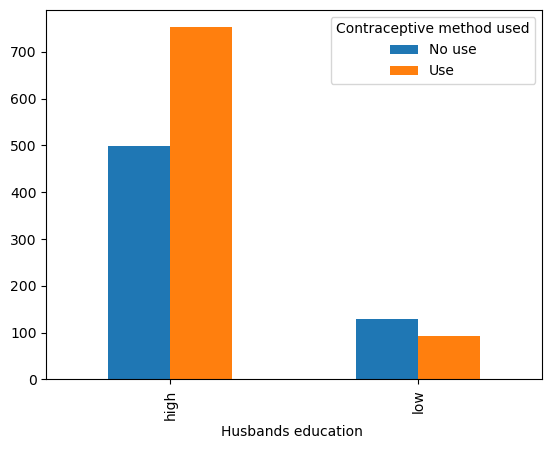

In [15]:
pd.crosstab(binomialYData[husbandsEducation], binomialYData[contraceptiveMethod]).plot(kind='bar')

<AxesSubplot:xlabel='Husbands education ,Wifes education'>

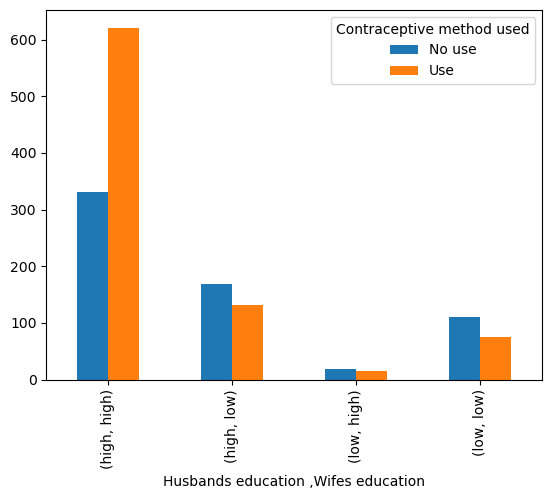

In [16]:
pd.crosstab([binomialYData[husbandsEducation], binomialYData[wifesEducation]], binomialYData[contraceptiveMethod]).plot(kind='bar')

In [12]:
noUseGroup = dataFrame.loc[dataFrame[contraceptiveMethod] == 'No use'].copy()

shortTermGroup = dataFrame.loc[dataFrame[contraceptiveMethod] == 'Short term'].copy()

longTermGroup = dataFrame.loc[dataFrame[contraceptiveMethod] == 'Long term'].copy()